In [287]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

CSV_FILENAME = "sales-201803.csv"

csv_filepath = os.path.join("data", CSV_FILENAME)

df = pd.read_csv(csv_filepath)


In [300]:
os.path.isfile("data/sales-201803.csv") 

True

In [288]:
df.head()

,date,product,unit price,units sold,sales price
0,2018-03-01,Button-Down Shirt,65.05,2,130.10
1,2018-03-01,Vintage Logo Tee,15.95,1,15.95
2,2018-03-01,Sticker Pack,4.50,1,4.50
3,2018-03-02,Super Soft Hoodie,75.00,2,150.00
4,2018-03-02,Button-Down Shirt,65.05,7,455.35


In [289]:
products=df['product'].unique()
products.sort()

In [290]:
products

array(['Baseball Cap', 'Brown Boots', 'Button-Down Shirt', 'Khaki Pants',
       'Sticker Pack', 'Super Soft Hoodie', 'Vintage Logo Tee'],
      dtype=object)

In [291]:
sales_price=df.groupby(df['product']).sum()

In [292]:
sales_price_col=list(sales_price['sales price'])

In [312]:
total_price_by_prod=pd.DataFrame({'products':products,'sales_price':sales_price_col})
total_price_by_prod=total_price_by_prod.sort_values(by=['sales_price'],ascending=False)

In [313]:
total_price=round(sales_price[['sales price']].sum()[0],2)

In [314]:
total_price_by_prod

,products,sales_price
2,Button-Down Shirt,6960.35
5,Super Soft Hoodie,1875.00
3,Khaki Pants,1602.00
6,Vintage Logo Tee,941.05
1,Brown Boots,250.00
4,Sticker Pack,216.00
0,Baseball Cap,156.31


In [315]:
price=plot=[round(a,2) for a in list(total_price_by_prod['sales_price'])]
price

[6960.35, 1875.0, 1602.0, 941.05, 250.0, 216.0, 156.31]

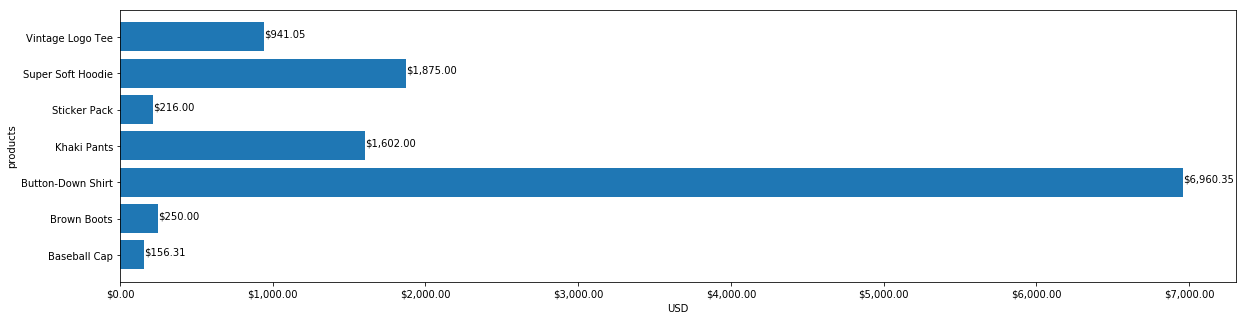

In [296]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20)
ax.barh(total_price_by_prod['products'],total_price_by_prod['sales_price']
       )
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.set_xlabel("USD")
ax.set_ylabel("products")
ax.xaxis.set_major_formatter(tick)
for i, v in enumerate(total_price_by_prod['sales_price']):
    ax.text(v , i , "${0:,.2f}".format(v))